<a href="https://colab.research.google.com/github/chaeho28/deeplearning_-/blob/main/fire_just_detection_chaeho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **필요한 라이브러리 정리**

1.   항목 추가
2.   항목 추가



In [2]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output as cls


In [4]:
batch_Size = 32
image_Size = 196
epochs = 5
channels = 3

# **Data spliting**

In [5]:
data_dir = "/content/drive/MyDrive/RIS/영상데이터사진/fire_dataset"

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_Size , image_Size ),
  batch_size=batch_Size)

Found 1199 files belonging to 2 classes.
Using 960 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_Size , image_Size ),
  batch_size=batch_Size)

Found 1199 files belonging to 2 classes.
Using 239 files for validation.


In [8]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 196, 196, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
labels = train_ds.class_names
labels

['fire_images', 'non_fire_images']

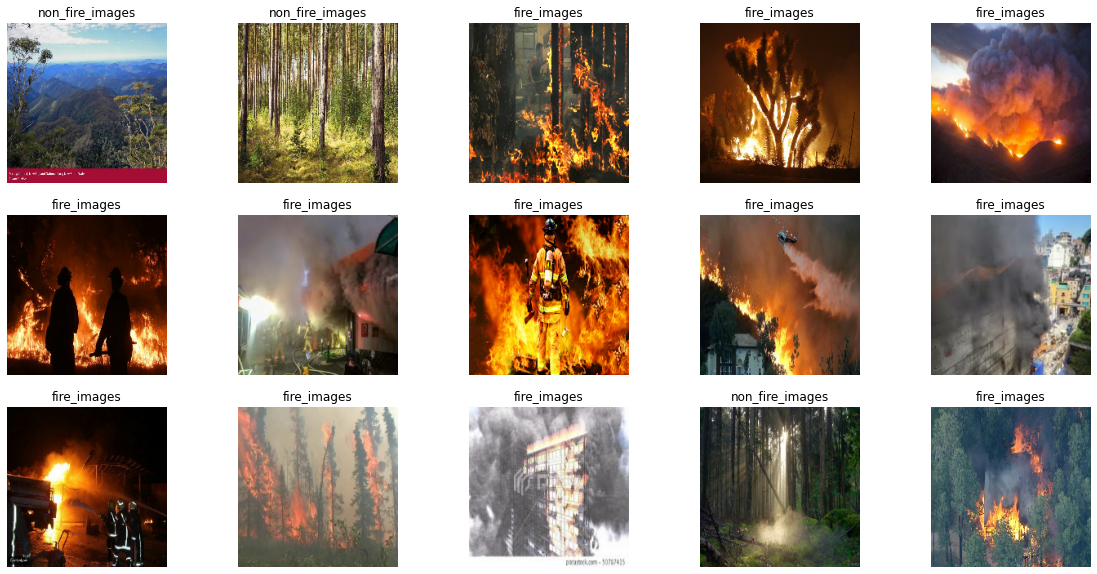

In [10]:
plt.figure(figsize=(20,10))
for imgBatch, labelBatch in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i+1)
        plt.imshow(imgBatch[i].numpy().astype('uint8'))
        plt.title(labels[labelBatch[i]])
        plt.axis("off")
        cls()

In [14]:
scaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(196, 196),
    layers.experimental.preprocessing.Rescaling(1./255.)
])

In [15]:
model = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(batch_Size, image_Size, image_Size, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])



In [17]:
model.compile(    optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
    )
history = model.fit(train_ds,
                       batch_size=batch_Size,
                       validation_data=val_ds,
                       verbose=1,
                       epochs=epochs)

Epoch 1/5
30/30 [==============================] - 265s 9s/step - loss: 0.4666 - accuracy: 0.7656 - val_loss: 0.3549 - val_accuracy: 0.8368
Epoch 2/5
30/30 [==============================] - 224s 7s/step - loss: 0.3012 - accuracy: 0.8146 - val_loss: 0.2264 - val_accuracy: 0.9247
Epoch 3/5
30/30 [==============================] - 224s 7s/step - loss: 0.2046 - accuracy: 0.9333 - val_loss: 0.2259 - val_accuracy: 0.9540
Epoch 4/5
30/30 [==============================] - 230s 8s/step - loss: 0.2301 - accuracy: 0.9260 - val_loss: 0.1001 - val_accuracy: 0.9665
Epoch 5/5
30/30 [==============================] - 223s 7s/step - loss: 0.1499 - accuracy: 0.9521 - val_loss: 0.1201 - val_accuracy: 0.9623


# **정확도 시각화**

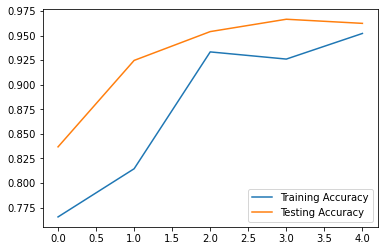

In [18]:
plt.plot(history.history['accuracy'] ,label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

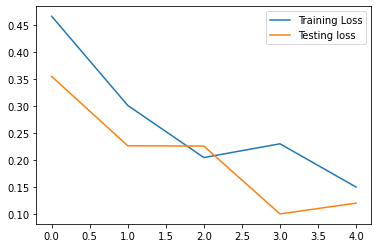

In [19]:

plt.plot(history.history['loss'] ,label='Training Loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.legend()

In [20]:
def PredictIMG(data, classes, model):
    
    for imgs, lab in iter(data):
        label = np.array(lab)
        
        for i in range(len(imgs)):
            
            img = tf.expand_dims(imgs[i], axis=0)
            Tlab = classes[label[i]]
            
            pred = model.predict(img)[0]
            pred = 1 if pred>0.5 else 0
            predlab = classes[pred]
            title = "True : {lab}\nPred : {predlab}"
            print("true: ",Tlab, "pred: ",predlab)
    
            
    

In [27]:
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 196, 196, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
labels

['fire_images', 'non_fire_images']

In [21]:
PredictIMG(val_ds, labels, model)

1/1 [==============================] - 0s 220ms/step
true:  fire_images pred:  fire_images
1/1 [==============================] - 0s 66ms/step
true:  fire_images pred:  fire_images
1/1 [==============================] - 0s 69ms/step
true:  non_fire_images pred:  non_fire_images
1/1 [==============================] - 0s 67ms/step
true:  non_fire_images pred:  fire_images
1/1 [==============================] - 0s 66ms/step
true:  fire_images pred:  fire_images
1/1 [==============================] - 0s 82ms/step
true:  fire_images pred:  fire_images
1/1 [==============================] - 0s 66ms/step
true:  fire_images pred:  fire_images
1/1 [==============================] - 0s 75ms/step
true:  fire_images pred:  fire_images
1/1 [==============================] - 0s 67ms/step
true:  fire_images pred:  fire_images
1/1 [==============================] - 0s 71ms/step
true:  fire_images pred:  fire_images
1/1 [==============================] - 0s 67ms/step
true:  non_fire_images pred:  non_f

In [22]:
model.evaluate(val_ds)

8/8 [==============================] - 15s 1s/step - loss: 0.1201 - accuracy: 0.9623


[0.1200801208615303, 0.9623430967330933]

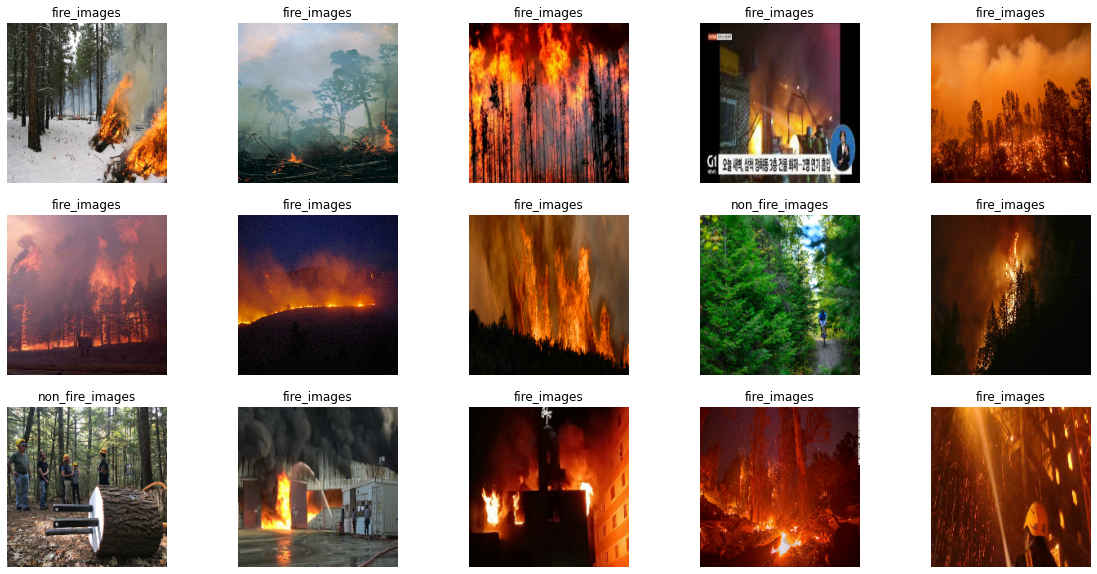

In [29]:
plt.figure(figsize=(20,10))
for imgBatch, labelBatch in val_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i+1)
        plt.imshow(imgBatch[i].numpy().astype('uint8'))
        plt.title(labels[labelBatch[i]])
        plt.axis("off")
        cls()

In [ ]:
model.save('model.h5')

In [ ]:
!ls

drive  model.h5  model.png  sample_data


In [ ]:
!mv model.h5 /content/drive/MyDrive/RIS/model

In [ ]:
! ls /content/drive/MyDrive/RIS/model

fire-detection_chaeho.ipynb  model.h5
